# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Загружаем данные из файла в датафрейм
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

In [3]:
# Выводим первые 5 строк таблицы
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
# Выводим последние 5 строк таблицы
data.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Выведем общую информацию по таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [6]:
# Выведем числовые значения таблицы
data.describe().astype('int')

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699,23699,23699,23699,14504,23613,21796,23699,21421,12180,18157,18180,18181,8079,18181,9110,20518
mean,9,6541548,60,2,2,10,34,5,10,1,28793,14191,0,490,0,517,180
std,5,10887013,35,1,1,6,22,4,5,1,12630,8608,0,342,0,277,219
min,0,12190,12,0,1,1,2,1,1,0,0,181,0,1,0,13,1
25%,6,3400000,40,1,2,5,18,2,7,0,18585,9238,0,288,0,294,45
50%,9,4650000,52,2,2,9,30,4,9,1,26726,13098,0,455,1,502,95
75%,14,6800000,69,3,2,16,42,8,12,2,37273,16293,1,612,1,729,232
max,50,763000000,900,19,100,60,409,33,112,5,84869,65968,3,3190,3,1344,1580


In [7]:
# Выявим сумму пропущенных и неопределенных значений по столбцам
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Вывод**

Изучив данные можно сказать, что в данных довольно много пропущенных или отсутствующих значений, а также в некоторых столбцах присутствуют аномальные значения.

### Предобработка данных

Перед предобработкой данных, проверим таблицу на наличие явных дубликатов.

In [8]:
# Удалим явные дубликаты (если они есть)
data.duplicated().sum()

0

Явных дубликатов нет.
Приступим к предобработке данных. Пойдем по порядку, по каждому столбцу.

In [9]:
# Приведем все столбцы к нижнему регистру и змеиному стилю
data = data.rename(
    columns={'cityCenters_nearest' : 'city_centers_nearest',
            'parks_around3000' : 'parks_around_3000',
            'ponds_around3000' : 'ponds_around_3000'}
)
# Проверим выполнение замены
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

***Столбцы last_price и first_day_exposition***

In [10]:
# Приведем столбец last_price к типу данных int (целому числу)
data['last_price'] = data['last_price'].astype('int')

In [11]:
# Приведем столбец first_day_exposition к типу данных datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

***Столбец ceiling_height***

В столбце ceiling_height тип данных float оставим, но поработаем со значениями NaN и аномальными значениями.

In [12]:
# Вычислим среднее значение по высоте потолков, ограничив выборку по адекватным значениям
data.query('ceiling_height > 2 and ceiling_height < 5')['ceiling_height'].mean()

2.7258333909914896

In [13]:
# Будет логично заменить аномальные значения на среднее значение чтобы не терять данные (не может быть высоты потолка меньше 2 метров или больше 5 метров)
ceiling_height_mean = 2.73
data.loc[data['ceiling_height'] > 5, 'ceiling_height'] = ceiling_height_mean
data.loc[data['ceiling_height'] < 2, 'ceiling_height'] = ceiling_height_mean

In [14]:
# Также, заполним NaN средним значением
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height_mean)

***Столбец floors_total***

В столбце floors_total заменим тип данных на int. Но сначала, заменим пропущенные данные. 

In [15]:
# С учетом того, что количество пропущенных значений очень мала, заменю их значениями из столбца floor (как минимум этаж квартиры не может быть выше этажей дома)
data['floors_total'] = data['floors_total'].fillna(data['floor'])

In [16]:
# Приведем к типу данных int
data['floors_total'] = data['floors_total'].astype('int')

***Промежуточная проверка изменений***

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [18]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

***Столбец living_area***

Логично заменить пустые значения столбца средним процентом жилой площади от всей площади

In [19]:
# Создадим переменную без пропусков в столбце living_area
living_area_nan = data[['total_area', 'living_area']].dropna(subset = ['living_area'])

In [20]:
# В новой переменной создадим столбец содержащий доли жилой площади от общей
living_area_nan['segment'] = living_area_nan['living_area'] / living_area_nan['total_area']

In [21]:
# Заполним пустые значения в столбце living_area произведением общей площади и медианным значением доли жилой площади. Также приведем к типу данных int
data['living_area'] = data['living_area'].fillna(data['total_area'] * living_area_nan['segment'].median()).astype('int')

***Столбец is_apartment***

Данные из столбца не актуальны для выполнения задач. Но обрабоем их. Заменим тип данных на bool и заменим значения NaN на False, так как будем считать что человек не будет заполнять эту информацию, если жилье не является аппартаментами

In [22]:
# Заменим тип данных на bool и заменим значения NaN на False

data['is_apartment'] = data['is_apartment'].fillna(False)

***Столбец kitchen_area***

Аналогично с living_area, заменим пустые значения столбца средним процентом площади кухни от всей площади.
Также, присвоим значение площади кухни 0 для студий (в студии площадь комнаты уже учитывает площадь кухни).

In [23]:
# Присвоим всем пропущенным значениям площади кухни для студий значение 0 
data['kitchen_area'] = data['kitchen_area'].fillna(0)

In [24]:
# Создадим переменную без пропусков в столбце kitchen_area
kitchen_area_nan = data[['total_area','kitchen_area']].dropna(subset = ['kitchen_area'])

In [25]:
# В новой переменной создадим столбец содержащий доли площади кухни от общей
kitchen_area_nan['segment'] = kitchen_area_nan['kitchen_area'] / kitchen_area_nan['total_area']

In [26]:
# Заполним пустые значения в столбце kitchen_area произведением общей площади и медианным значением доли площади кухни. Также приведем к типу данных int
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * kitchen_area_nan['segment'].median()).astype('int')

***Столбец balcony***

Заполним столбец исходя из того, что если бы были балконы - их наличие и количество указали.
Также, изменим тип данных на int.

In [27]:
# Присвоим значение 0 и изменим тип данных на int
data['balcony'] = data['balcony'].fillna(0).astype('int')

***Столбец locality_name***

Узнаем уникальные значения и устраним неявные дубликаты.

In [28]:
# Выведем уникальные значения в столбце
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [29]:
# Приведем значения к нижнему регистру
data['locality_name'] = data['locality_name'].str.lower()
# Заменим типичную ошибку написания буквы е и ё
data['locality_name'] = data['locality_name'].str.replace('поселок','посёлок')
# Проверка
data['locality_name'].unique()

array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'посёлок городского типа красный бор', 'гатчина',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'посёлок молодцово',
       'посёлок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'посёлок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'посёлок торковичи', 'посёлок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'посёлок новый свет

In [30]:
# Строки со значением NaN заполним 0 (не будем удалять строки)
data['locality_name'] = data['locality_name'].fillna(0)

***Столбцы airports_nearest, city_centers_nearest, parks_around_3000, parks_nearest, ponds_around_3000, ponds_nearest***

Эти данные не повлияют на решение вопросов и результат исследования. Оставим их как есть. Возможно мы еще к ним вернемся.

***Столбец days_exposition***

Поработаем с отсутствующими данными и типом данных столбца.

In [31]:
# Для просмотра распределения пропусков по годам, посмотрим, какие года есть в столбце first_day_exposition
data['first_day_exposition'].sort_values().unique()

array(['2014-11-27T00:00:00.000000000', '2014-11-29T00:00:00.000000000',
       '2014-12-04T00:00:00.000000000', ...,
       '2019-05-01T00:00:00.000000000', '2019-05-02T00:00:00.000000000',
       '2019-05-03T00:00:00.000000000'], dtype='datetime64[ns]')

В столбце first_day_exposition имеются года с 2014 по 2019.

In [32]:
# Введем новый столбец 'exposition_day_year'
# Посмотрим распределение пропусков в столбце 'days_exposition' по этим годам
data['first_day_year'] = data['first_day_exposition'].dt.year
data.groupby('first_day_year')['days_exposition'].apply(lambda data: data.isna().sum())

first_day_year
2014      18
2015      70
2016      67
2017     271
2018     959
2019    1796
Name: days_exposition, dtype: int64

Видим что большая часть пропусков в 2018-2019 годах. Значит удалять пропуски нельзя, иначе по этим годам будет сильное искажение.

In [33]:
# Отсутствующие данные заполним медианным значением, тип данных поставим int
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median()).astype('int')

In [34]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition             0
first_day_year              0
dtype: int64

***Вывод по предобработке данных***

Все необходимые данные предобработаны и готовы для исследования. 
Хочу отметить, что их было довольно много. Это могло произойти при выгрузке данных, или при их сборе.
Необходимо сообщить об этом ответственным сотрудникам. 


### Посчитайте и добавьте в таблицу новые столбцы

***Добавление цены одного квадратного метра***

In [35]:
# Создаем новый столбец в датафрейме и находим частное от деления цены на момент снятия с публикации на жилую площадь. Приводим к типу данных int
data['meter_price'] = (data['last_price'] / data['total_area']).astype('int')

***Добавление дня, месяца и года публикации объявления***

In [36]:
# Добавляем столбцы с днем, месяцев и годом публикации объявления
data['day_week'] = data['first_day_exposition'].dt.weekday
data['number_month'] = data['first_day_exposition'].dt.month
data['number_year'] = data['first_day_exposition'].dt.year

***Добавление этажа квартиры***

In [37]:
# Создадим функцию группировки этажей
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
# Добавим новый столбец, и применим к ней функцию
data['floor_group'] = data.apply(floor_group, axis = 1)

# Добавим расстояние до центра города в километрах
data['city_сenters_nearest_km'] = (data['city_centers_nearest'] / 1000).round()

***Добавление соотношения жилой площади к общей площади, и площади кухни к общей площади***

In [38]:
# Добавляем столбцы с долей жилой площади и долей площади кухни
data['living_segment'] = round((data['living_area'] / data['total_area']), 2)
data['kitchen_segment'] = round((data['kitchen_area'] / data['total_area']), 2)

***Проверка всех добавлений***

In [39]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,first_day_year,meter_price,day_week,number_month,number_year,floor_group,city_сenters_nearest_km,living_segment,kitchen_segment
0,20,13000000,108.00,2019-03-07,3,2.70,16,51,8,False,...,95,2019,120370,3,3,2019,другой,16.0,0.47,0.23
1,7,3350000,40.40,2018-12-04,1,2.73,11,18,1,False,...,81,2018,82920,1,12,2018,первый,19.0,0.45,0.27
2,10,5196000,56.00,2015-08-20,2,2.73,5,34,4,False,...,558,2015,92785,3,8,2015,другой,14.0,0.61,0.14
3,0,64900000,159.00,2015-07-24,3,2.73,14,90,9,False,...,424,2015,408176,4,7,2015,другой,7.0,0.57,0.00
4,2,10000000,100.00,2018-06-19,2,3.03,14,32,13,False,...,121,2018,100000,1,6,2018,другой,8.0,0.32,0.41
5,10,2890000,30.40,2018-09-10,1,2.73,12,14,5,False,...,55,2018,95065,0,9,2018,другой,NaN,0.46,0.30
6,6,3700000,37.30,2017-11-02,1,2.73,26,10,6,False,...,155,2017,99195,3,11,2017,другой,19.0,0.27,0.38
7,5,7915000,71.60,2019-04-18,2,2.73,24,40,22,False,...,95,2019,110544,3,4,2019,другой,12.0,0.56,0.25
8,20,2900000,33.16,2018-05-23,1,2.73,27,15,26,False,...,189,2018,87454,2,5,2018,другой,NaN,0.45,0.24
9,18,5400000,61.00,2017-02-26,3,2.50,9,43,7,False,...,289,2017,88524,6,2,2017,другой,15.0,0.70,0.10


### Проведите исследовательский анализ данных

***Анализ общей площади, жилой площади и площади кухни***

<AxesSubplot:ylabel='Frequency'>

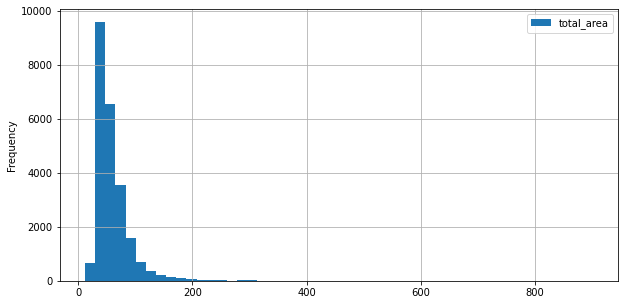

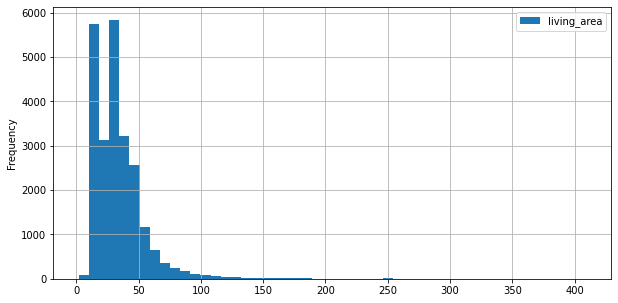

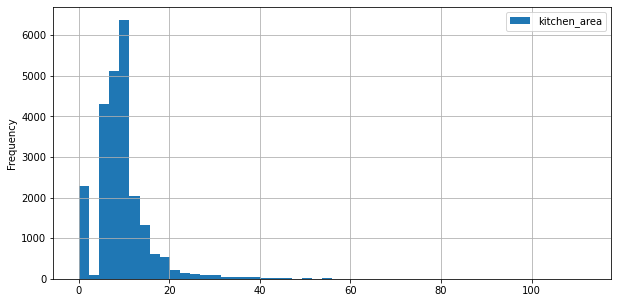

In [40]:
# Построим гистограммы

data.plot(y = 'total_area', bins = 50, grid = True, kind = 'hist', figsize = (10,5))

data.plot(y = 'living_area', bins = 50, grid = True, kind = 'hist', figsize = (10,5))

data.plot(y = 'kitchen_area', bins = 50, grid = True, kind = 'hist', figsize = (10,5))

Анализ общей площади


count    23279.000000
mean        57.399051
std         24.528217
min         20.100000
25%         40.000000
50%         51.500000
75%         68.000000
max        169.500000
Name: total_area, dtype: float64

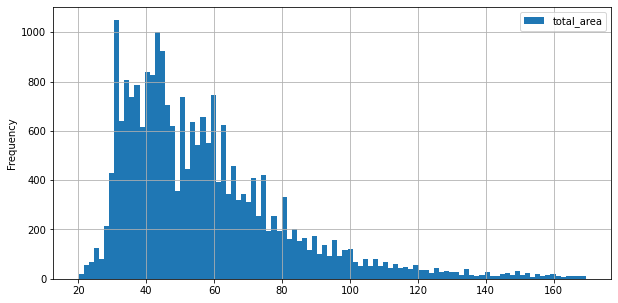

In [41]:
# Отсечем значения общей площади свыше 170м и меньше 20м - будем считать выбросами
data = data[data['total_area'] < 170]
data = data[data['total_area'] > 20]
print('Анализ общей площади')
data.plot(y = 'total_area', bins = 100, grid = True, kind = 'hist', figsize = (10,5))
data['total_area'].describe()

Среднее значение общей площади 59.0 м², медиана 54.0 м². Основная масса жилья площадью от 42 м² до 70.0 м².

Анализ жилой площади


count    21700.000000
mean        33.880369
std         15.846406
min         16.000000
25%         20.000000
50%         30.000000
75%         42.000000
max        119.000000
Name: living_area, dtype: float64

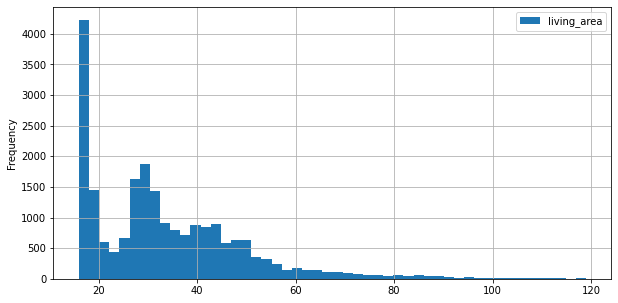

In [42]:
# Отсечем значения жилой площади свыше 120м и меньше 15м - будем считать выбросами
data = data[data['living_area'] < 120]
data = data[data['living_area'] > 15]
print('Анализ жилой площади')
data.plot(y = 'living_area', bins = 50, grid = True, kind = 'hist', figsize = (10,5))
data['living_area'].describe()

Среднее значение жилой площади 34.0 м², медиана 31.0 м². Основная масса квартир с жилой площади от 20 м² до 42.0 м².

Анализ жилой площади


count    17976.000000
mean        10.441978
std          4.871223
min          6.000000
25%          7.000000
50%          9.000000
75%         12.000000
max         49.000000
Name: kitchen_area, dtype: float64

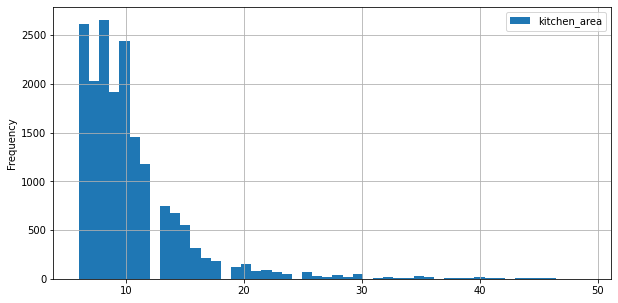

In [43]:
# Отсечем значения площади кухни свыше 50м и меньше 5м (мы давали значение 0 для студий) - будем считать выбросами
data = data[data['kitchen_area'] < 50]
data = data[data['kitchen_area'] > 5]
print('Анализ жилой площади')
data.plot(y = 'kitchen_area', bins = 50, grid = True, kind = 'hist', figsize = (10,5))
data['kitchen_area'].describe()

Среднее значение площади кухни 10.4 м², медиана 9.0 м². Основная масса площадей кухонь в квартирах от 7 м² до 12.0 м².

***Анализ цены объекта***

count    1.797600e+04
mean     6.266733e+06
std      5.047702e+06
min      1.219000e+04
25%      3.700000e+06
50%      4.998000e+06
75%      7.100000e+06
max      1.240000e+08
Name: last_price, dtype: float64

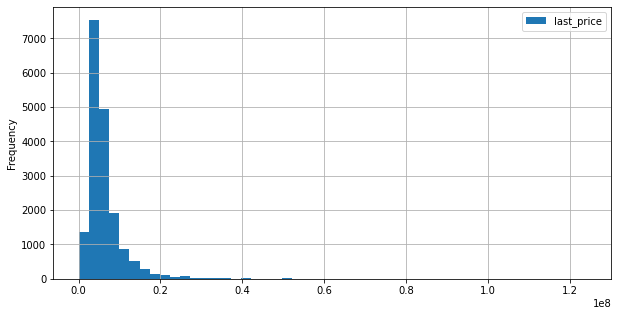

In [44]:
data.plot(y = 'last_price', bins = 50, grid = True, kind = 'hist', figsize = (10,5))
data['last_price'].describe()

Имеем выбросы (слишком дорогие и слишком дешевые квартиры)

In [45]:
# Посчитаем количество дорогих квартир и попробуем их убрать
data.loc[data['last_price'] > 1.5e+07, 'last_price'].count()

752

In [46]:
# Посчитаем количество дешевых квартир и попробуем их убрать
data.loc[data['last_price'] < 1.5e+06, 'last_price'].count()

399

In [47]:
# Убираем выбросы
data = data[data['last_price'] < 1.5e+07]
data = data[data['last_price'] > 1.5e+06]

count    1.677400e+04
mean     5.598063e+06
std      2.652591e+06
min      1.510000e+06
25%      3.750000e+06
50%      4.950000e+06
75%      6.800000e+06
max      1.500000e+07
Name: last_price, dtype: float64

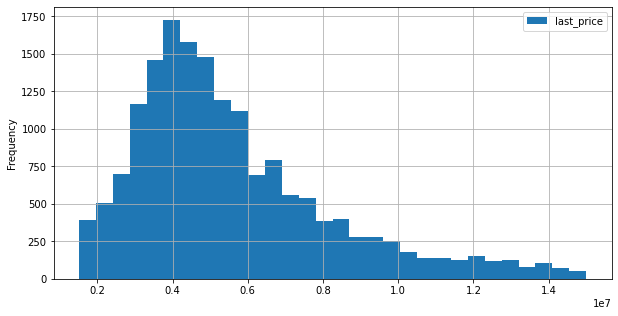

In [48]:
# Построим гистограмму
data.plot(y = 'last_price', bins = 30, grid = True, kind = 'hist', figsize = (10,5))
data['last_price'].describe()

Среднее значение цены квартиры 5.6 млн, медиана 5.0 млн. Цена за квартиру варьируется от 3,7 млн до 6,8 млн.

***Количество комнат***

count    16774.000000
mean         2.087218
std          0.918143
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

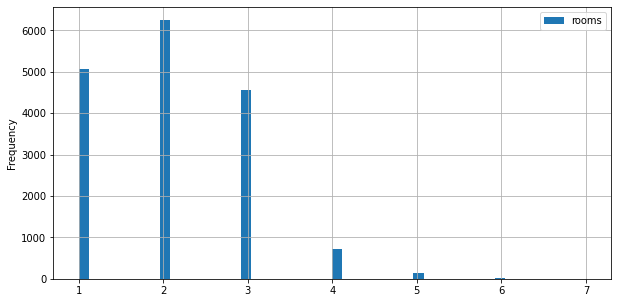

In [49]:
# Построим гистограмму
data.plot(y = 'rooms', bins = 50, grid = True, kind = 'hist', figsize = (10,5))
data['rooms'].describe()

Среднее значение количества комнат равно 1, медиана равна 2. В основном количество комнат в квартире составляет от 1 до 3.

***Высота потолков***

count    16774.000000
mean         2.721751
std          0.200101
min          2.000000
25%          2.600000
50%          2.730000
75%          2.730000
max          4.800000
Name: ceiling_height, dtype: float64

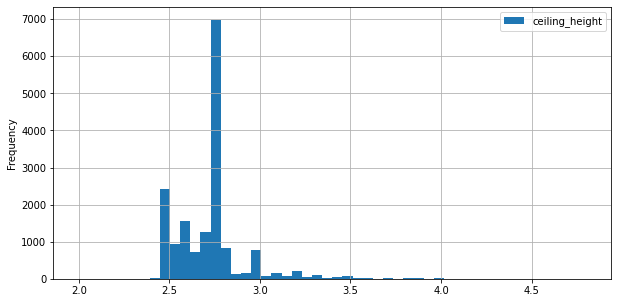

In [50]:
# Построим гистограмму
data.plot(y = 'ceiling_height', bins = 50, grid = True, kind = 'hist', figsize = (10,5))
data['ceiling_height'].describe()

Среднее значение высоты потолков практически равно медиане. В основном, высота потолков составляет от 2.6 м до 2,73 м.

***Этаж квартиры***

count    16774.000000
mean         6.020866
std          4.839539
min          1.000000
25%          2.250000
50%          5.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

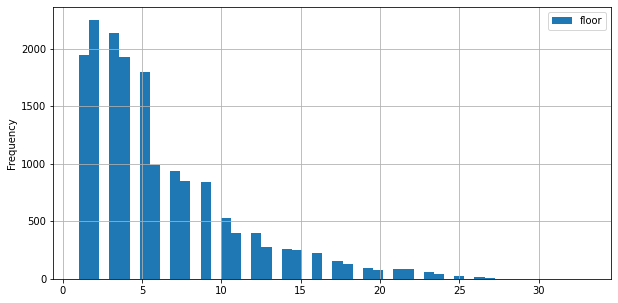

In [51]:
# Построим гистограмму
data.plot(y = 'floor', bins = 50, grid = True, kind = 'hist', figsize = (10,5))
data['floor'].describe()

Среднее значение этажа квартиры 6, медианы 4. В основном квартиры расположены на 2-8 этажах.

***Тип этажа***

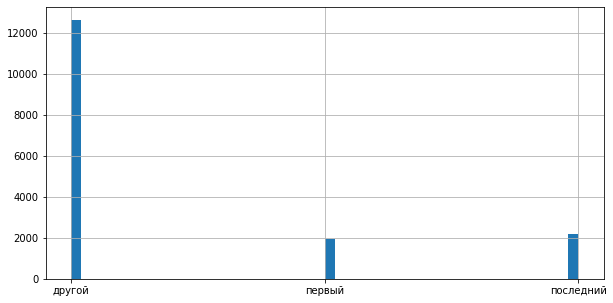

In [52]:
data['floor_group'].hist(figsize = (10,5), bins = 50)
plt.show()

В большинстве случае квартиры расположены не на первом и не на последнем этажах.

***Количество этажей в доме***

count    16774.000000
mean        11.029152
std          6.426804
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

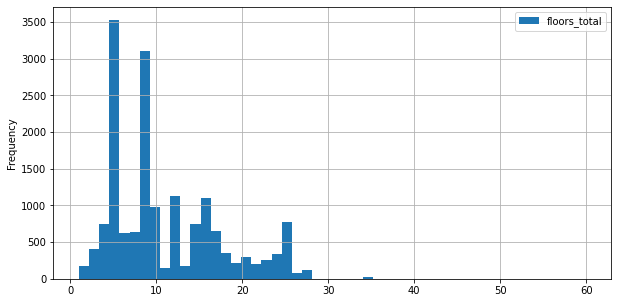

In [53]:
# Построим гистограмму
data.plot(y = 'floors_total', bins = 50, grid = True, kind = 'hist', figsize = (10,5))
data['floors_total'].describe()

Среднее значение общего количества этажей в доме 11, медиана 9. В основном общее количество этажей в доме от 5 до 16.

***Расстояние до центра города***

count    13343.000000
mean     14299.216518
std       8207.161063
min        208.000000
25%      10003.000000
50%      13302.000000
75%      16219.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

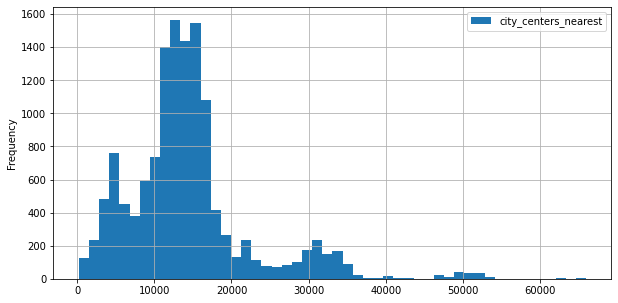

In [54]:
# Построим гистограмму
data.plot(y = 'city_centers_nearest', bins = 50, grid = True, kind = 'hist', figsize = (10,5))
data['city_centers_nearest'].describe()

Среднее значение до центра 14,3 км, медиана 13,3 км. Значение до центра варьируется от 10 км до 16,3 км.

***Расстояние до ближайшего аэропорта***

count    13330.000000
mean     28982.115679
std      12613.014574
min          0.000000
25%      18591.500000
50%      27199.000000
75%      37407.000000
max      84869.000000
Name: airports_nearest, dtype: float64

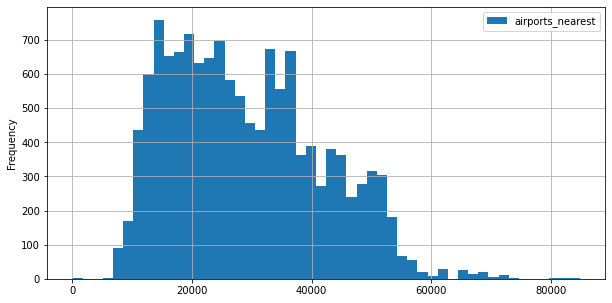

In [55]:
# Построим гистограмму
data.plot(y = 'airports_nearest', bins = 50, grid = True, kind = 'hist', figsize = (10,5))
data['airports_nearest'].describe()

Видим, что минимальное значение до аэропорта 0 (мы не можем жить прям в аэропорту).


In [56]:
# Посчитаем количество квартир в радиусе 7 км от аэропорта, будем считать их выбросами и попробуем их убрать
data.loc[data['airports_nearest'] < 7000, 'airports_nearest'].count()

8

In [57]:
# Убираем выбросы
data = data[data['airports_nearest'] > 7000]

count    13322.000000
mean     28995.890857
std      12604.139109
min       7002.000000
25%      18621.000000
50%      27212.500000
75%      37407.000000
max      84869.000000
Name: airports_nearest, dtype: float64

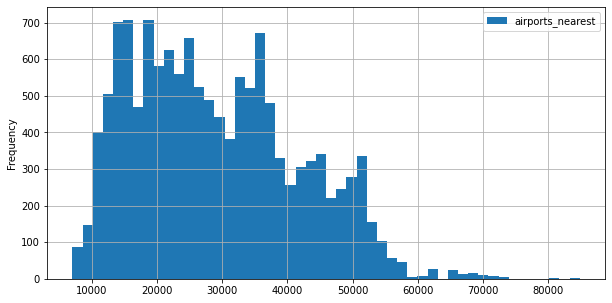

In [58]:
# Построим гистограмму после очистки от выбросов
data.plot(y = 'airports_nearest', bins = 50, grid = True, kind = 'hist', figsize = (10,5))
data['airports_nearest'].describe()

Среднее значение до аэропорта 29 км, медиана 27,2 км. Значение до аэропорта варьируется от 18,6 км до 37,4 км.

***Расстояние до ближайшего парка***

count    5676.000000
mean      490.376674
std       324.804276
min         1.000000
25%       295.000000
50%       459.000000
75%       616.000000
max      3064.000000
Name: parks_nearest, dtype: float64

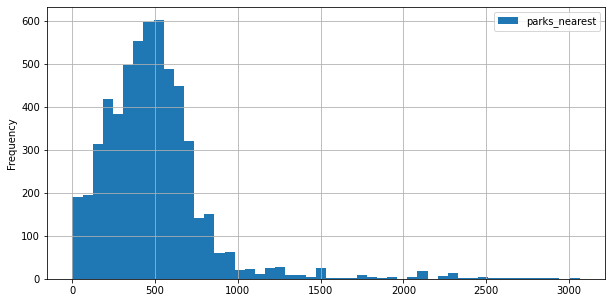

In [59]:
# Построим гистограмму
data.plot(y = 'parks_nearest', bins = 50, grid = True, kind = 'hist', figsize = (10,5))
data['parks_nearest'].describe()

Среднее значение до парка 500 метров, медиана 459 метров. Значение до парка варьируется от 295 метров до 617 метров.

***День публикации объявления***

count    13322.000000
mean         2.554196
std          1.783015
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max          6.000000
Name: day_week, dtype: float64

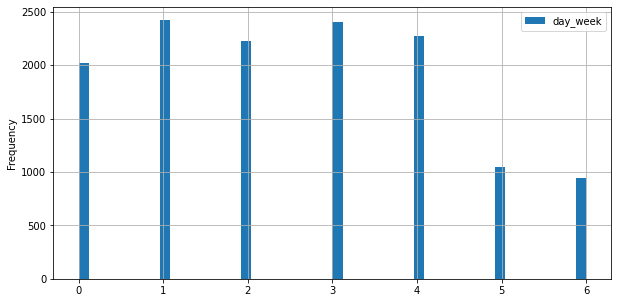

In [60]:
# Построим гистограмму
data.plot(y = 'day_week', bins = 50, grid = True, kind = 'hist', figsize = (10,5))
data['day_week'].describe()

Большинство объявлений публиковались в будние дни.

***Месяц публикации объявления***

count    13322.000000
mean         6.422759
std          3.447974
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: number_month, dtype: float64

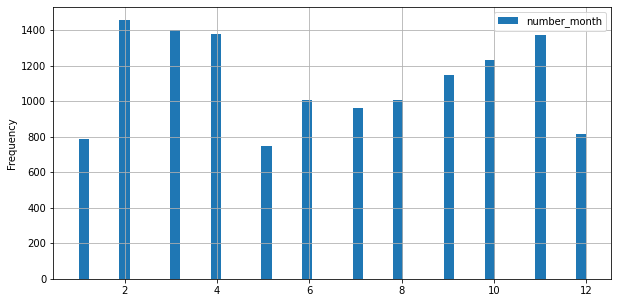

In [61]:
# Построим гистограмму
data.plot(y = 'number_month', bins = 50, grid = True, kind = 'hist', figsize = (10,5))
data['number_month'].describe()

Явные лидеры по количеству объявлений - февраль, март, апрель, ноябрь. Летом количество объявлений значительно снижается.

***Общий вывод***

Все гистограммы в целом имеют распределение Пуассона. 
Большинство квартир имеют характеристики:
- площадь квартиры от 42 м² до 70 м²;
- цена от 3,7 млн до 6,7 млн;
- количество комнат от 1 до 3.

***Как быстро продавались квартиры***

count    13322.000000
mean       171.787569
std        209.214084
min          1.000000
25%         47.000000
50%         95.000000
75%        204.000000
max       1553.000000
Name: days_exposition, dtype: float64

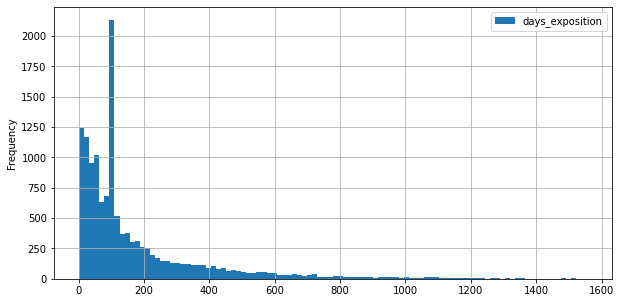

In [62]:
# Построим гистограмму
data.plot(y = 'days_exposition', bins = 100, grid = True, kind = 'hist', figsize = (10,5))
data['days_exposition'].describe()

***Вывод***

Среднее значение продажи квартир - 169 дней, медианное значение - 95 дней.
В большинстве случаев продажа квартир занимает в районе 100 дней.
Быстрыми продажами можно считать продажи до 45 дней.
Долгими продажами можно считать продажи от 199 дней.

***Факторы, больше всего влияющие на общую (полную) стоимость объекта***

Корреляция общей площади и цены: 0.7885226133950816


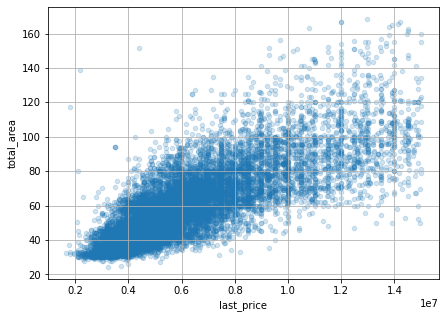

In [63]:
# Ищем корреляцию общей площади и цены, а также строим диаграмму рассеивания
print('Корреляция общей площади и цены:', data['total_area'].corr(data['last_price']))
data.plot(y = 'total_area', x = 'last_price', kind = 'scatter', figsize = (7,5), \
                 grid = True, alpha = 0.2);

Корреляция жилой площади и цены: 0.669621083316782


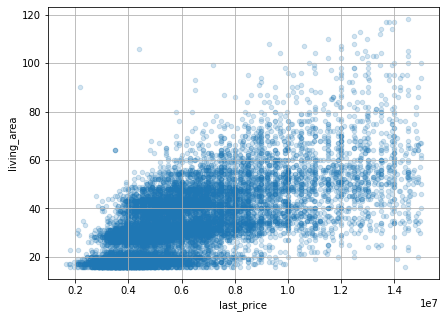

In [64]:
# Ищем корреляцию жилой площади и цены, а также строим диаграмму рассеивания
print('Корреляция жилой площади и цены:', data['living_area'].corr(data['last_price']))
data.plot(y = 'living_area', x = 'last_price', kind = 'scatter', figsize = (7,5), \
                 grid = True, alpha = 0.2);

Корреляция площади кухни и цены: 0.5465719346942184


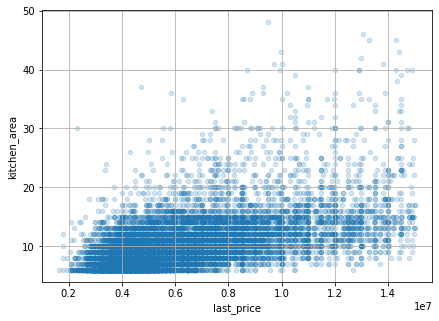

In [65]:
# Ищем корреляцию площади кухни и цены, а также строим диаграмму рассеивания
print('Корреляция площади кухни и цены:', data['kitchen_area'].corr(data['last_price']))
data.plot(y = 'kitchen_area', x = 'last_price', kind = 'scatter', figsize = (7,5), \
                 grid = True, alpha = 0.2);

Корреляция цены и числа комнат: 0.5257092042072674


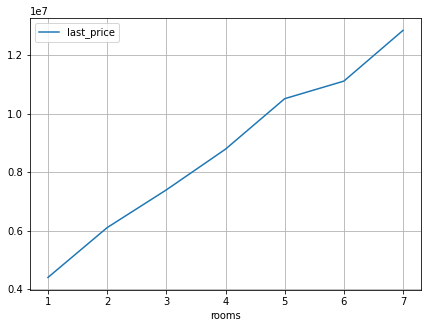

In [66]:
# Ищем корреляцию цены и числа комнат
print('Корреляция цены и числа комнат:', data['last_price'].corr(data['rooms']))
# Объявим новую переменную (сводную таблицу по числу комнат и среднему значению цены квартиры), и построим график
price_rooms = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'mean')
price_rooms.plot(y = 'last_price', figsize = (7,5), grid = True );

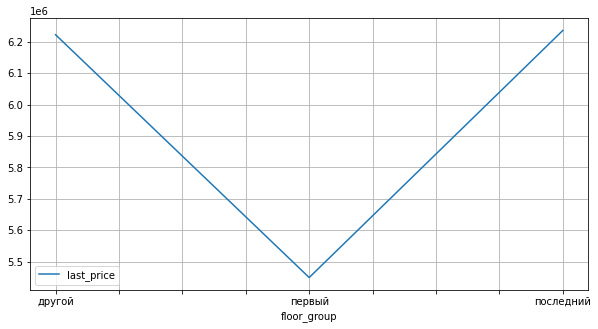

In [67]:
# Объявим новую переменную (сводную таблицу по этажу и среднему значению цены квартиры) и построим график
price_floor = data.pivot_table(index = 'floor_group', values = 'last_price', aggfunc = 'mean')
price_floor.plot(y = 'last_price', figsize = (10,5), grid = True );

Корреляция удаленности от центра и цены квартиры: -0.3583586841395006


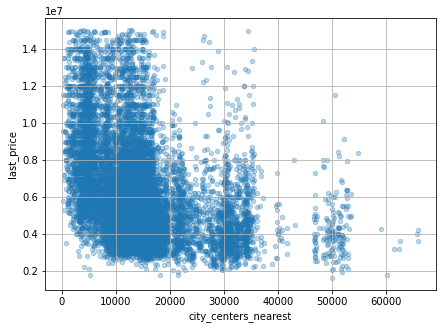

In [68]:
# Ищем корреляцию удаленности от центра и цены, также строим диаграмму рассеивания
print('Корреляция удаленности от центра и цены квартиры:', data['city_centers_nearest'].corr(data['last_price']))
data.plot(y = 'last_price', x = 'city_centers_nearest', kind = 'scatter', figsize = (7,5),\
                 grid = True, alpha = 0.3);

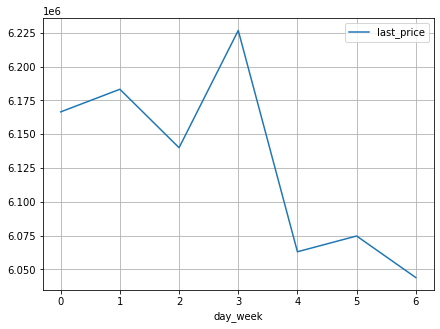

In [69]:
# Объявим новую переменную (сводную таблицу по дням недели и среднему значению цены квартиры) и построим график
price_day = data.pivot_table(index = 'day_week', values = 'last_price', \
                                         aggfunc = 'mean')
price_day.plot(y = 'last_price', figsize = (7,5), grid = True );

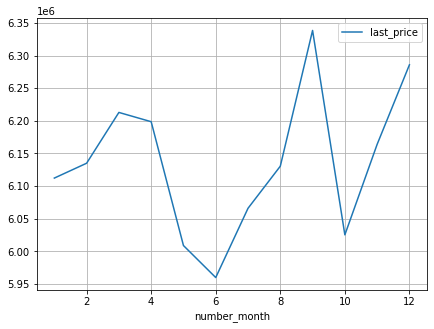

In [70]:
# Объявим новую переменную (сводную таблицу по дням недели и среднему значению цены квартиры) и построим график
price_month = data.pivot_table(index = 'number_month', values = 'last_price', \
                                         aggfunc = 'mean')
price_month.plot(y = 'last_price', figsize = (7,5), grid = True );

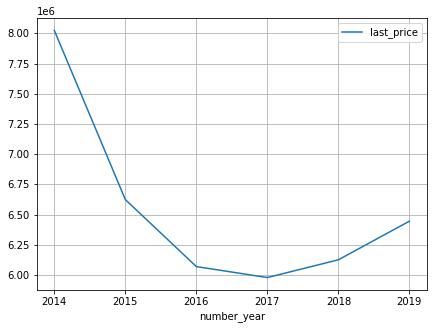

In [71]:
# Объявим новую переменную (сводную таблицу по дням недели и среднему значению цены квартиры) и построим график
price_year = data.pivot_table(index = 'number_year', values = 'last_price', \
                                         aggfunc = 'mean')
price_year.plot(y = 'last_price', figsize = (7,5), grid = True );

***Вывод***

Можно сделать вывод о том, что цена квартиры зависит от:
- площади квартиры (а соответственно жилой площади и площади кухни);
- числа комнат;
- отдаленности от центра.

Квартиры на первом этаже дешевле, чем на остальных этажах.

В будние дни цены по объявлениям выше, чем в выходные.

Пик самых дешевых объявлений по квартирам приходится на июнь, а самых дорогих - на сентябрь.

Также, мы видим тенденцию к снижению цены на квартиры по объявлению с 2014 по 2018 год, хотя в 2019 году мы видим рост.


***Задание 1***

In [72]:
# Посчитаем среднюю цену 1 м² в 10 населенных пунктах с наибольшим числом объявлений
one_meter_price_mean = data.pivot_table(index='locality_name', values='meter_price', aggfunc=['count', 'mean'])
one_meter_price_mean = one_meter_price_mean.sort_values(by=('count', 'meter_price'), ascending=False)
print(one_meter_price_mean.head(10))

                        count           mean
                  meter_price    meter_price
locality_name                               
санкт-петербург         11602  106605.342269
посёлок шушары            328   76605.045732
колпино                   278   74721.960432
пушкин                    228  103411.035088
посёлок парголово         211   86396.317536
сестрорецк                134  100265.171642
петергоф                  118   84269.203390
красное село              117   71734.752137
ломоносов                  77   71962.129870
кронштадт                  66   80023.121212


***Вывод***

По количеству объявлений и цены за 1 м² лидером является Санкт-Петербург.
Самая низкая цена за 1 м², а также самое маленькое количество объявлений в Выборге.
Стоит отметить, что в Пушкине цена за 1 м² практически такая же, как и в Санкт-Петербурге.

***Задание 2***

In [73]:
# Вычислим среднюю цену каждого километра до центра и сохраним результаты в новый столбец price_per_km

data['price_per_km'] = data['last_price'] / data['city_сenters_nearest_km']

# В столбце 'city_сenters_nearest_km' встречаются значения, равные 0. Посчитаем их количество и к какому наименованию они относятся

print(data.loc[data['city_сenters_nearest_km'] == 0, 
    ['locality_name', 'city_сenters_nearest_km']]
    .value_counts('locality_name')
)

locality_name
санкт-петербург    10
dtype: int64


In [74]:
# Просто удалим строки с 0 (они не повлияют на результат)
data = data.query('city_сenters_nearest_km != 0')

In [75]:
# Вычислим среднюю цену каждого километра до центра для квартир в Санкт-Петербурге

price_per_km_spb = data.pivot_table(index='locality_name', values='price_per_km')
price_per_km_spb = price_per_km_spb.query('locality_name in "санкт-петербург"')
print(price_per_km_spb)

                 price_per_km
locality_name                
санкт-петербург  837775.34899


<AxesSubplot:xlabel='city_сenters_nearest_km'>

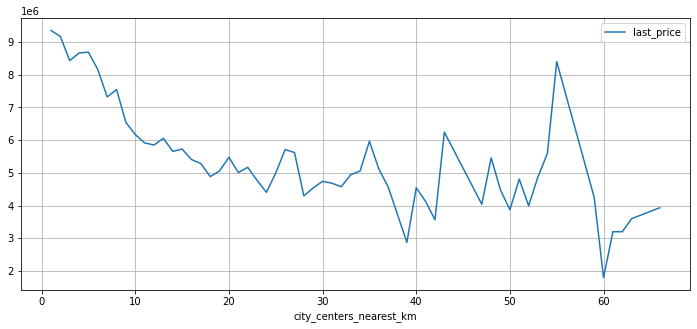

In [76]:
data.pivot_table(index='city_сenters_nearest_km', values='last_price').plot(grid=True, figsize=(12, 5))

***Вывод***

Можно сказать о том, что в Санкт-Петербурге есть зависимость цены от расстояния до центра. Чем дальше от центра - тем дешевле.
Однако, можно заметить всплески стоимости в районе 43 км и 55 км от центра. Возможно это связано с тем, что там находится элитное жилье.

### Общий вывод

Проведено исследование с целью выявления особенностей и зависимостей, которые существуют на рынке недвижимости.
В данных было выявлено множество пропусков, которые могут влиять на результат исследования. Нужно обратить на это внимание.

В исследовании было выявлено:

1. Зависимость цен на квартиры от:
- площади квартиры;
- числа комнат;
- этажа, на котором расположена квартира;
- отдаленности от центра.
2. Самые дорогие квартиры в Санкт-Петербурге.
3. Квартиры на первом этаже дешевле, чем на остальных этажах.
4. Цены на объявления по квартирам выше в будние дни.
5. Самые дорогие объявления по квартирам приходятся на сентябрь.
6. Нет зависимости роста стоимости квартир от даты размещения объявления.
